In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train=pd.read_csv('D:\\srinivas\\data analytics\\datasets\\vidhya analytics\\loan default ml hiring\\train.csv')
df_test=pd.read_csv('D:\\srinivas\\data analytics\\datasets\\vidhya analytics\\loan default ml hiring\\test.csv')
df_sample=pd.read_csv('D:\\srinivas\\data analytics\\datasets\\vidhya analytics\\loan default ml hiring\\sample_submission.csv')

In [3]:
df_train.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,3,4,5,6,7,8,9,10,11,1


In [4]:
#there are no missing values
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116058 entries, 0 to 116057
Data columns (total 29 columns):
loan_id                     116058 non-null int64
source                      116058 non-null object
financial_institution       116058 non-null object
interest_rate               116058 non-null float64
unpaid_principal_bal        116058 non-null int64
loan_term                   116058 non-null int64
origination_date            116058 non-null object
first_payment_date          116058 non-null object
loan_to_value               116058 non-null int64
number_of_borrowers         116058 non-null float64
debt_to_income_ratio        116058 non-null float64
borrower_credit_score       116058 non-null float64
loan_purpose                116058 non-null object
insurance_percent           116058 non-null float64
co-borrower_credit_score    116058 non-null float64
insurance_type              116058 non-null float64
m1                          116058 non-null int64
m2                  

# Preprocessing

In [5]:
df_train.source.value_counts()

X    63858
Y    37554
Z    14646
Name: source, dtype: int64

In [6]:
#dummies for source 
df_train=pd.get_dummies(df_train,columns=['source'],drop_first=True)
df_test=pd.get_dummies(df_test,columns=['source'],drop_first=True)

In [7]:
df_train.head()

,loan_id,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,...,m6,m7,m8,m9,m10,m11,m12,m13,source_Y,source_Z
0,268055008619,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,22.0,...,0,1,0,0,0,0,0,1,0,1
1,672831657627,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,44.0,...,0,0,0,0,0,1,0,1,1,0
2,742515242108,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,33.0,...,0,0,0,0,0,0,0,1,0,1
3,601385667462,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,44.0,...,0,0,0,1,1,1,1,1,0,0
4,273870029961,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,43.0,...,5,6,7,8,9,10,11,1,0,0


In [8]:
df_train.financial_institution.value_counts()

OTHER                          49699
Browning-Hart                  31852
Swanson, Newton and Miller      6874
Edwards-Hoffman                 4857
Martinez, Duffy and Bird        4715
Miller, Mcclure and Allen       3158
Nicholson Group                 2116
Turner, Baldwin and Rhodes      1846
Suarez Inc                      1790
Cole, Brooks and Vincent        1642
Richards-Walters                1459
Taylor, Hunt and Rodriguez      1259
Sanchez-Robinson                1193
Sanchez, Hays and Wilkerson      853
Romero, Woods and Johnson        750
Thornton-Davis                   651
Anderson-Taylor                  483
Richardson Ltd                   473
Chapman-Mcmahon                  388
Name: financial_institution, dtype: int64

In [9]:
df_train.loan_purpose.value_counts()

A23    58462
B12    29383
C86    28213
Name: loan_purpose, dtype: int64

In [10]:
#dummies for loan purpose
df_train=pd.get_dummies(df_train,columns=['loan_purpose'],drop_first=True)
df_test=pd.get_dummies(df_test,columns=['loan_purpose'],drop_first=True)

In [11]:
df_train.drop(['financial_institution'],1,inplace=True)
df_test.drop(['financial_institution'],1,inplace=True)

# feature engineering

In [12]:
from datetime import datetime
from dateutil import parser

In [13]:
#adding diff of first payment and loan date

df_train['month_diff'] = df_train.apply(lambda df_train: parser.parse(df_train.first_payment_date).month - parser.parse(df_train.origination_date).month,axis=1)
df_test['month_diff'] = df_test.apply(lambda df_test: parser.parse(df_test.first_payment_date).month - parser.parse(df_test.origination_date).month,axis=1)


In [14]:
df_train.head()

,loan_id,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,...,m9,m10,m11,m12,m13,source_Y,source_Z,loan_purpose_B12,loan_purpose_C86,month_diff
0,268055008619,4.250,214000,360,2012-03-01,05/2012,95,1.0,22.0,694.0,...,0,0,0,0,1,0,1,0,1,2
1,672831657627,4.875,144000,360,2012-01-01,03/2012,72,1.0,44.0,697.0,...,0,0,1,0,1,1,0,1,0,2
2,742515242108,3.250,366000,180,2012-01-01,03/2012,49,1.0,33.0,780.0,...,0,0,0,0,1,0,1,1,0,2
3,601385667462,4.750,135000,360,2012-02-01,04/2012,46,2.0,44.0,633.0,...,1,1,1,1,1,0,0,1,0,2
4,273870029961,4.750,124000,360,2012-02-01,04/2012,80,1.0,43.0,681.0,...,8,9,10,11,1,0,0,0,1,2


In [15]:
df_train.drop(['origination_date','first_payment_date'],1,inplace=True)
df_test.drop(['origination_date','first_payment_date'],1,inplace=True)

In [50]:
df_train['Total_amount']=(df_train['interest_rate']*df_train['unpaid_principal_bal']*df_train['loan_term'])/(100*360)
df_test['Total_amount']=(df_test['interest_rate']*df_test['unpaid_principal_bal']*df_test['loan_term'])/(100*360)

In [41]:
df_train.head()

,loan_id,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,co-borrower_credit_score,m1,...,m9,m10,m11,m12,m13,source_Y,loan_purpose_B12,loan_purpose_C86,month_diff,Total_amount
0,268055008619,4.250,214000,360,95,1.0,22.0,694.0,0.0,0,...,0,0,0,0,1,0,0,1,2,9095.0
1,672831657627,4.875,144000,360,72,1.0,44.0,697.0,0.0,0,...,0,0,1,0,1,1,1,0,2,7020.0
2,742515242108,3.250,366000,180,49,1.0,33.0,780.0,0.0,0,...,0,0,0,0,1,0,1,0,2,5947.5
3,601385667462,4.750,135000,360,46,2.0,44.0,633.0,638.0,0,...,1,1,1,1,1,0,1,0,2,6412.5
4,273870029961,4.750,124000,360,80,1.0,43.0,681.0,0.0,0,...,8,9,10,11,1,0,0,1,2,5890.0


# EDA

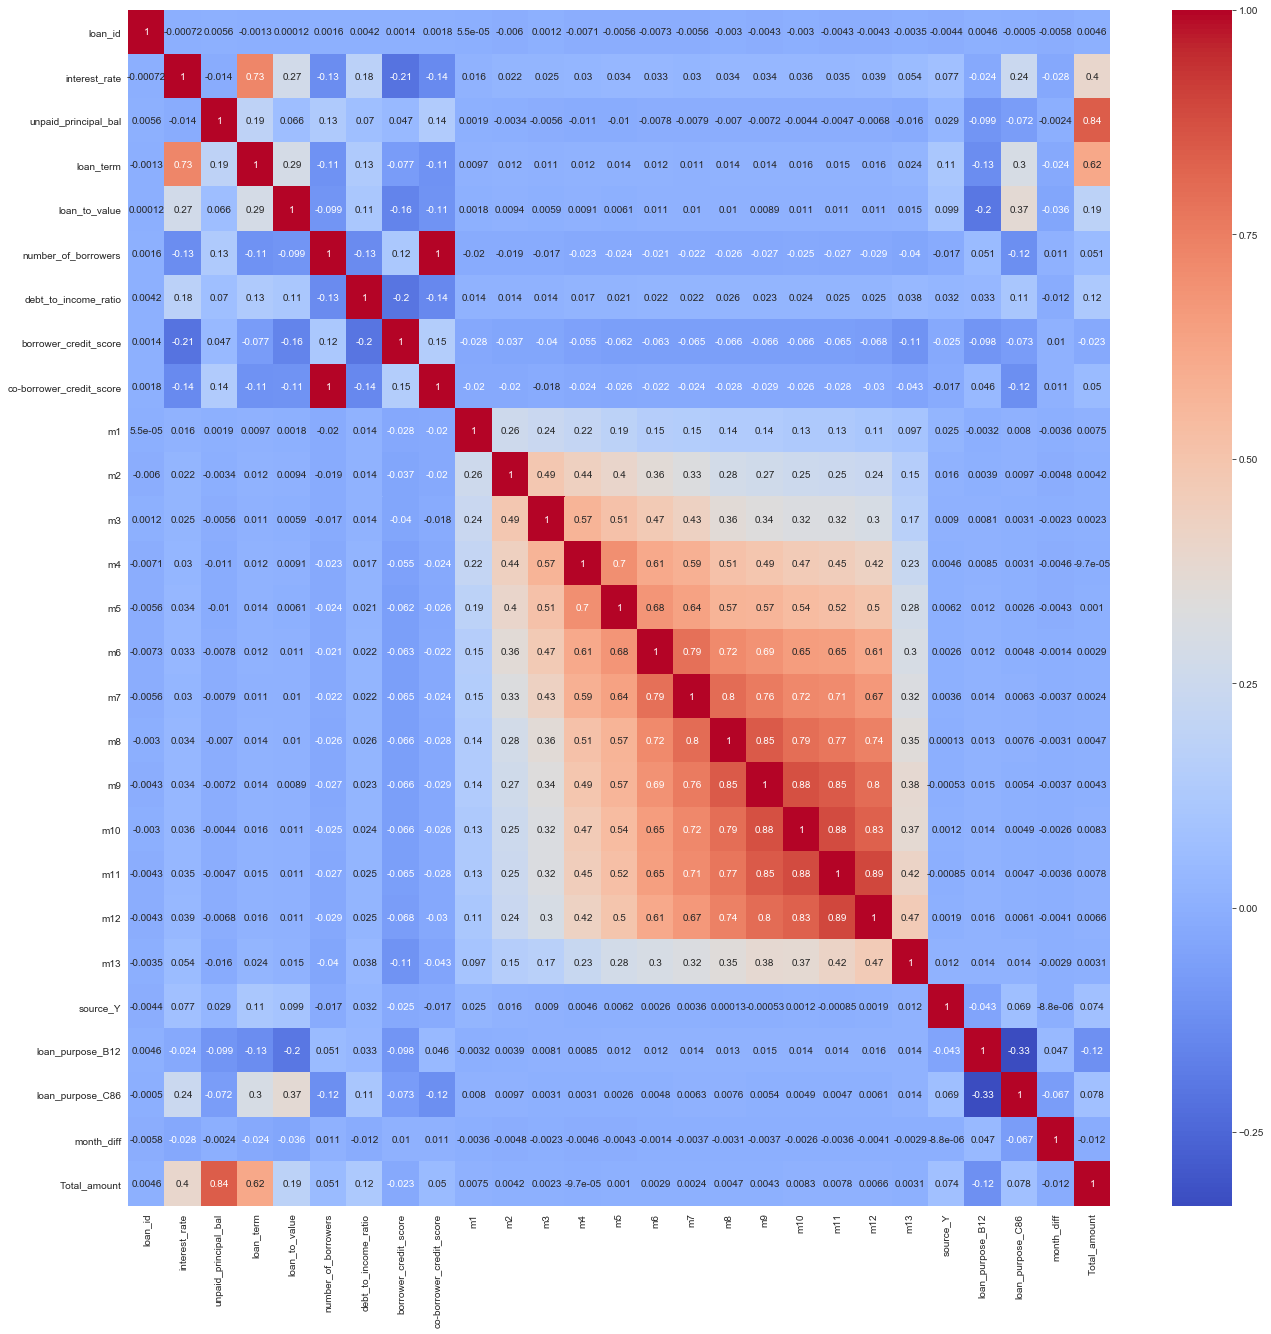

In [42]:
plt.figure(figsize=(22,22))
sns.heatmap(df_train.corr(),annot=True,cmap='coolwarm')

In [16]:
df_train.drop(['insurance_percent','insurance_type','source_Z'],axis=1,inplace=True)
df_test.drop(['insurance_percent','insurance_type','source_Z'],axis=1,inplace=True)

In [248]:
df_train.m13.value_counts()

0    109649
1       614
Name: m13, dtype: int64

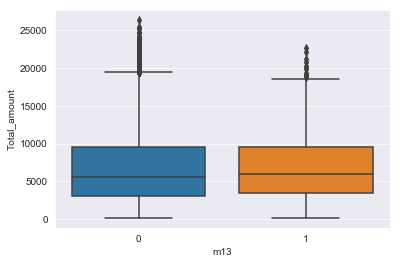

In [46]:
sns.boxplot(df_train.m13,df_train.Total_amount)

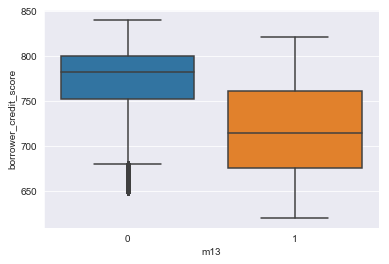

In [249]:
sns.boxplot(df_train.m13,df_train.borrower_credit_score)

In [17]:
#remove outlying borr credit score
out=list(df_train[(df_train.borrower_credit_score<650) & (df_train.m13==0)]['loan_id'].index)

In [18]:
df_train.drop(labels=out,axis=0,inplace=True)

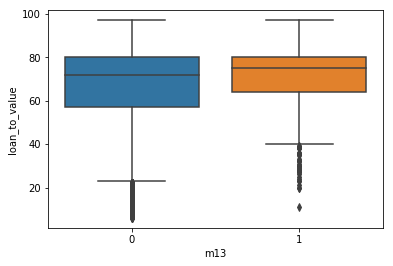

In [19]:
sns.boxplot(df_train.m13,df_train['loan_to_value'])

C:\Users\srinivas\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


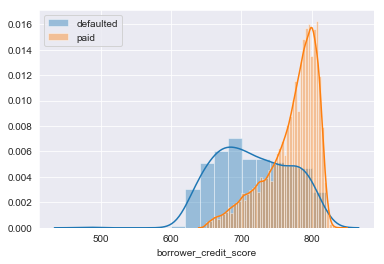

In [20]:
sns.set_style('darkgrid')
sns.distplot(df_train[df_train.m13==1].borrower_credit_score,label='defaulted')
sns.distplot(df_train[df_train.m13==0].borrower_credit_score,label='paid')
plt.legend()

In [21]:
# removing outlier with low credit score
df_train=df_train[df_train.borrower_credit_score>600]

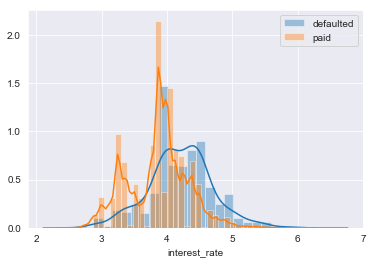

In [22]:
sns.distplot(df_train[df_train.m13==1].interest_rate,label='defaulted')
sns.distplot(df_train[df_train.m13==0].interest_rate,label='paid')
plt.legend()
#defaulters tend to have high interest rate

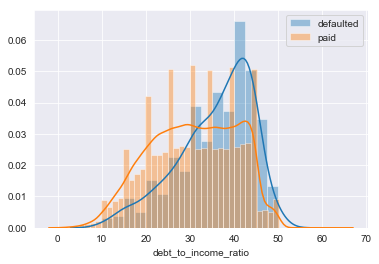

In [23]:
sns.distplot(df_train[df_train.m13==1]['debt_to_income_ratio'],label='defaulted')
sns.distplot(df_train[df_train.m13==0]['debt_to_income_ratio'],label='paid')
plt.legend()

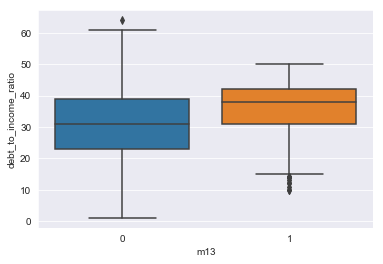

In [24]:
sns.boxplot(df_train.m13,df_train['debt_to_income_ratio'])

In [25]:
# removing users with low and high debt to income
df_train=df_train[df_train.debt_to_income_ratio>10]
df_train=df_train[df_train.debt_to_income_ratio<50]

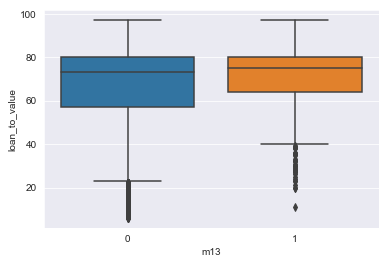

In [26]:
sns.boxplot(df_train.m13,df_train['loan_to_value'])

In [27]:
# remove outlier of loan to value
df_train=df_train[df_train.loan_to_value>20]

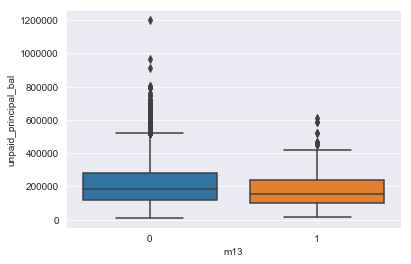

In [28]:
sns.boxplot(df_train.m13,df_train.unpaid_principal_bal)

In [29]:
# remove outlying unpaid principal 
df_train=df_train[df_train.unpaid_principal_bal<530000]

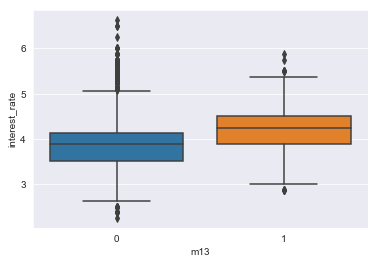

In [30]:
sns.boxplot(df_train.m13,df_train['interest_rate'])

In [31]:
#remove out interest rate
df_train=df_train[df_train.interest_rate<5.5]
df_train=df_train[df_train.interest_rate>2.5]

In [32]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35866 entries, 0 to 35865
Data columns (total 25 columns):
loan_id                     35866 non-null int64
interest_rate               35866 non-null float64
unpaid_principal_bal        35866 non-null int64
loan_term                   35866 non-null int64
loan_to_value               35866 non-null int64
number_of_borrowers         35866 non-null int64
debt_to_income_ratio        35866 non-null int64
borrower_credit_score       35866 non-null int64
co-borrower_credit_score    35866 non-null int64
m1                          35866 non-null int64
m2                          35866 non-null int64
m3                          35866 non-null int64
m4                          35866 non-null int64
m5                          35866 non-null int64
m6                          35866 non-null int64
m7                          35866 non-null int64
m8                          35866 non-null int64
m9                          35866 non-null int64
m10    

In [33]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110263 entries, 0 to 116057
Data columns (total 26 columns):
loan_id                     110263 non-null int64
interest_rate               110263 non-null float64
unpaid_principal_bal        110263 non-null int64
loan_term                   110263 non-null int64
loan_to_value               110263 non-null int64
number_of_borrowers         110263 non-null float64
debt_to_income_ratio        110263 non-null float64
borrower_credit_score       110263 non-null float64
co-borrower_credit_score    110263 non-null float64
m1                          110263 non-null int64
m2                          110263 non-null int64
m3                          110263 non-null int64
m4                          110263 non-null int64
m5                          110263 non-null int64
m6                          110263 non-null int64
m7                          110263 non-null int64
m8                          110263 non-null int64
m9                          1

In [695]:
from sklearn.decomposition import PCA

In [688]:
pca=PCA(n_components=2)

In [689]:
pca_df=pca.fit_transform(X)

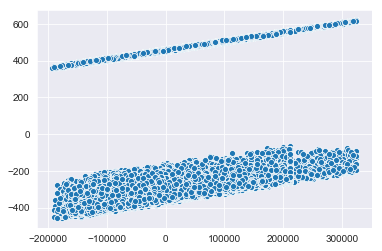

In [697]:
sns.scatterplot(pca_df[:,0],pca_df[:,1],hue_order=y,)

# ML

In [55]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix,classification_report,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier

In [56]:
X=df_train.drop(['m13','loan_id'],1)
y=df_train.m13

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=98)

In [57]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) #change to train

In [295]:
#
scaler=MinMaxScaler()
clf1=RandomForestClassifier(min_samples_split=8,max_depth=12,n_estimators=200,min_samples_leaf=3)#done
clf2=XGBClassifier(200,reg_lambda=10,scale_pos_weight=6)
clf3=CatBoostClassifier(scale_pos_weight=1,iterations=100,max_depth=8,colsample_bylevel=0.6,l2_leaf_reg=7) #done
clf4=ExtraTreesClassifier(max_depth=45,n_estimators=50)
clf5=RandomForestClassifier(min_samples_split=25,max_depth=3,n_estimators=100)
clfnn=MLPClassifier((25,13,))
clf_lgbm=LGBMClassifier(learning_rate=.06,n_estimators=100,reg_alpha=15,reg_lambda=50,min_child_samples=25)

In [296]:
# rf =0.32----min_samples_split=8,max_depth=9,n_estimators=250 
#xgboost
#catboost

In [297]:
pipe=Pipeline([('scaler',scaler),('clf',clf_lgbm)])

In [312]:
pipe_lgbm.fit(X_train_res,y_train_res)

Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('clf', LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.06, max_depth=-1,
        min_child_samples=25, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=15, reg_lambda=50, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0))])

In [313]:
pred=pipe.predict(X_test)
pred_train=pipe.predict(X_train_res)

In [314]:
print(f1_score(y_train_res,pred_train))
print(classification_report(y_train_res,pred_train),'\n')
print(confusion_matrix(y_train_res,pred_train),'\n')

print(f1_score(y_test,pred))
print(classification_report(y_test,pred),'\n')
print(confusion_matrix(y_test,pred))

0.9937301205922062
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     87726
           1       1.00      0.99      0.99     87726

   micro avg       0.99      0.99      0.99    175452
   macro avg       0.99      0.99      0.99    175452
weighted avg       0.99      0.99      0.99    175452
 

[[87502   224]
 [  872 86854]] 

0.5527272727272728
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21923
           1       0.52      0.58      0.55       130

   micro avg       0.99      0.99      0.99     22053
   macro avg       0.76      0.79      0.77     22053
weighted avg       0.99      0.99      0.99     22053
 

[[21854    69]
 [   54    76]]


# Catboost

In [839]:
clf3=CatBoostClassifier(scale_pos_weight=1,iterations=100,max_depth=8,colsample_bylevel=0.6,l2_leaf_reg=7)

In [2]:
f1_=[]
for i in [1]:
    clf3=CatBoostClassifier(scale_pos_weight=1,iterations=100,max_depth=8,colsample_bylevel=0.6,l2_leaf_reg=7)
    clf3.fit(X_train_res,y_train_res)
    pred=clf3.predict(X_test)
    pred_train=clf3.predict(X_train_res)
    score=f1_score(y_test,pred)
    train_score=f1_score(y_train_res,pred_train)
    f1_.append((score,train_score))
    print(i,'==>',score)


"\nf1_=[]\nfor i in [1]:\n    clf3=CatBoostClassifier(scale_pos_weight=1,iterations=100,max_depth=8,colsample_bylevel=0.6,l2_leaf_reg=7)\n    clf3.fit(X_train_res,y_train_res)\n    pred=clf3.predict(X_test)\n    pred_train=clf3.predict(X_train_res)\n    score=f1_score(y_test,pred)\n    train_score=f1_score(y_train_res,pred_train)\n    f1_.append((score,train_score))\n    print(i,'==>',score)\n"

# Voting

In [303]:
bag_cat=BaggingClassifier(clf3,n_estimators=5)
bag_rf_2=BaggingClassifier(clf5,n_estimators=5)
bag_lgbm=BaggingClassifier(clf_lgbm,n_estimators=5)


pipe_rf=Pipeline([('scaler',scaler),('clf',clf1)])
pipe_cat_bag=Pipeline([('scaler',scaler),('clf',bag_cat)])
pipe_rf_2=Pipeline([('scaler',scaler),('clf',bag_rf_2)])
pipe_xg=Pipeline([('scaler',scaler),('clf',clf2)])
pipe_lgbm=Pipeline([('scaler',scaler),('clf',clf_lgbm)])


vote=VotingClassifier([('rf',pipe_rf),('cat',pipe_cat_bag),('rf_2',pipe_rf_2),('bag_lgbm',pipe_lgbm)],voting='soft')#was xgb in lgbm

In [1]:
vote.fit(X_train_res,y_train_res)

In [305]:
pred=vote.predict(X_test)
pred_train=vote.predict(X_train_res)

In [306]:
print(f1_score(y_train_res,pred_train))
print(classification_report(y_train_res,pred_train),'\n')
print(confusion_matrix(y_train_res,pred_train),'\n')

print(f1_score(y_test,pred))
print(classification_report(y_test,pred),'\n')
print(confusion_matrix(y_test,pred))

0.9900468081440428
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     87726
           1       1.00      0.98      0.99     87726

   micro avg       0.99      0.99      0.99    175452
   macro avg       0.99      0.99      0.99    175452
weighted avg       0.99      0.99      0.99    175452
 

[[87528   198]
 [ 1535 86191]] 

0.5263157894736842
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21923
           1       0.51      0.54      0.53       130

   micro avg       0.99      0.99      0.99     22053
   macro avg       0.76      0.77      0.76     22053
weighted avg       0.99      0.99      0.99     22053
 

[[21857    66]
 [   60    70]]


# Parameter tuning

In [617]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import cross_val_score

In [750]:
params={
    #'n_estimators':[200,150,100],
    #'max_depth':[9,10,12],
    'scale_pos_weight':[2,4,6,8]
}

tune=GridSearchCV(clf2,param_grid=params,scoring='f1',cv=5)

In [751]:
tune.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'scale_pos_weight': [2, 4, 6, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [752]:
print(tune.best_params_)
print(tune.best_score_)

pred=tune.predict(X_test)
pred_train=tune.predict(X_train)

{'scale_pos_weight': 6}
0.5317654092546797


In [711]:
print(f1_score(y_train,pred_train))
print(classification_report(y_train,pred_train),'\n')
print(confusion_matrix(y_train,pred_train),'\n')

print(f1_score(y_test,pred))
print(classification_report(y_test,pred),'\n')
print(confusion_matrix(y_test,pred))

0.8581560283687943
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     87727
           1       1.00      0.75      0.86       483

   micro avg       1.00      1.00      1.00     88210
   macro avg       1.00      0.88      0.93     88210
weighted avg       1.00      1.00      1.00     88210
 

[[87727     0]
 [  120   363]] 

0.492462311557789
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21922
           1       0.72      0.37      0.49       131

   micro avg       1.00      1.00      1.00     22053
   macro avg       0.86      0.69      0.75     22053
weighted avg       0.99      1.00      0.99     22053
 

[[21903    19]
 [   82    49]]


# Pred on test set

In [315]:
df_test.drop('m13',1,inplace=True)

In [316]:
df_test['m13']=test_pred=pipe_lgbm.predict(df_test.drop('loan_id',1))

In [317]:
submission=df_test[['loan_id','m13']]

In [318]:
submission.to_csv('sub_lgbm_bag.csv',index=False)

In [319]:
submission.m13.value_counts()

0    35657
1      209
Name: m13, dtype: int64

In [270]:
submission.head()

,loan_id,m13
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
